In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
url = 'http://www.tianqihoubao.com/lishi/shanghai/month/202009.html'
resp = requests.get(url)
html = resp.content.decode('gbk')
soup = BeautifulSoup(html,'html.parser')
tr_list = soup.find_all('tr')
_dates = 1
dates,contains,temp = [],[],[]
for data in tr_list[1:]:  
    sub_data = data.text.split()
    dates.append(str(_dates))
    contains.append(','.join(sub_data[1:3]))
    temp.append(','.join(sub_data[3:6]))
    _dates += 1
_data = pd.DataFrame()
_data['Date'] = dates
_data['Weather'] = contains
_data['Temperature'] = temp

In [3]:
data = pd.concat([_data]).reset_index(drop = True)

In [4]:
data.to_csv('./shanghai_sep_weather.csv',encoding='utf-8')

In [5]:
from matplotlib import pyplot as plt
import pandas as pd

In [6]:
data = pd.read_csv('./shanghai_sep_weather.csv')

In [7]:
data['HighTemperature'] = data['Temperature'].str.split('/',expand=True)[0]
data['LowTemperature'] = data['Temperature'].str.split('/',expand=True)[1]
data['HighTemperature'] = data['HighTemperature'].map(lambda x:x.replace('℃,',''))
data['LowTemperature'] = data['LowTemperature'].map(lambda x:x.replace(',',''))
data['LowTemperature'] = data['LowTemperature'].map(lambda x:x.replace('℃',''))

In [8]:
dates = data['Date']
highs = data['HighTemperature']
lows = data['LowTemperature']

([<matplotlib.axis.XTick at 0x16af94fb730>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

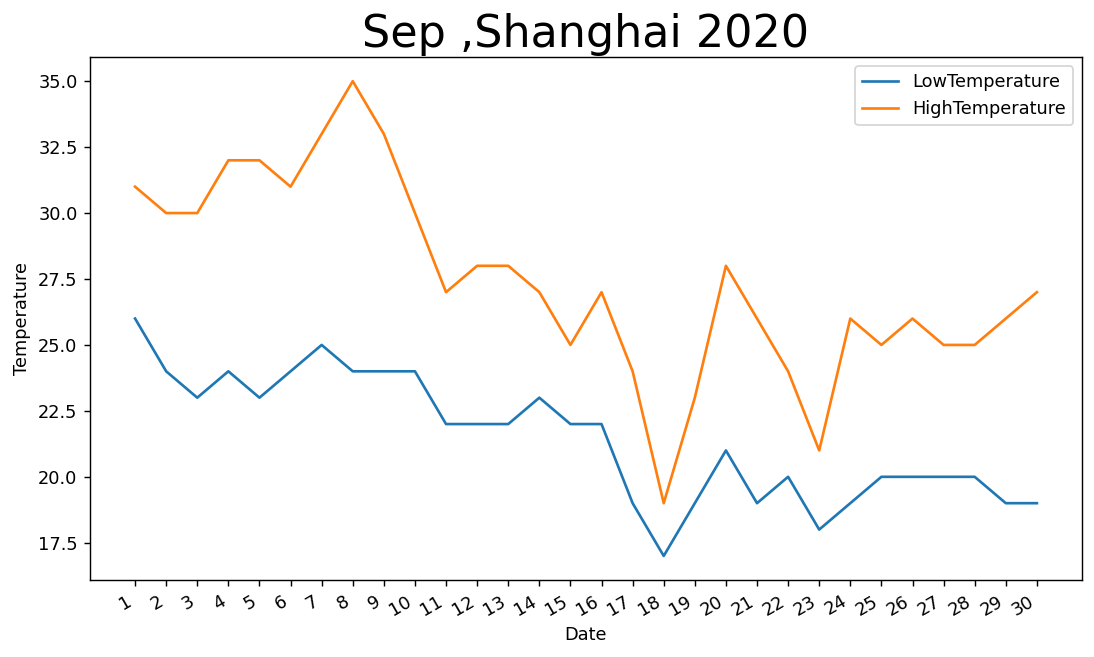

In [9]:
fig = plt.figure(dpi=128,figsize=(10,6))

low_temp = []
high_temp = []

for x in lows:
    low_temp.append(int(x))

for y in highs:
    high_temp.append(int(y))

L1,=plt.plot(dates,low_temp,label='LowTemperature')
L2,=plt.plot(dates,high_temp,label='HighTemperature')
plt.legend(handles=[L1,L2],labels=['LowTemperature','HighTemperature'], loc='best')

plt.title('Sep ,Shanghai 2020',fontsize=25)  
plt.xlabel('Date',fontsize=10)   
fig.autofmt_xdate() 
plt.ylabel('Temperature',fontsize=10) 
plt.tick_params(axis='both',which='major',labelsize=10)

plt.xticks(dates[::1])  




In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

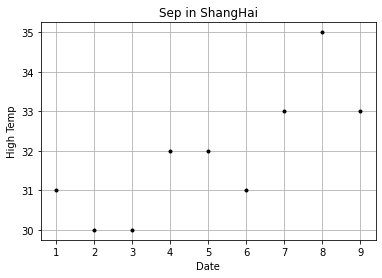

In [11]:
plt.figure()
plt.title('Sep in ShangHai')
plt.xlabel('Date')
plt.ylabel('High Temp')
plt.grid(True) 
xTrain = np.array([1,2,3,4,5,6,7,8,9])
yTrain = np.array([31,30,30,32,32,31,33,35,33])
plt.plot(xTrain, yTrain, 'k.')

In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [13]:

xTrain = np.array([1,2,3,4,5,6,7,8,9])[:, np.newaxis]
yTrain = np.array([31,30,30,32,32,31,33,35,33])


In [14]:

model = LinearRegression()
hypothesis = model.fit(xTrain, yTrain)
print("theta0=", hypothesis.intercept_)
print("theta1=", hypothesis.coef_)

theta0= 29.555555555555557
theta1= [0.46666667]


In [15]:
model.predict([[10]])

array([34.22222222])

In [16]:
xNew = np.array([0,10, 11, 12])[:, np.newaxis]
yNew = model.predict(xNew)
print("预测新数据：", xNew)
print("预测结果：", yNew)

预测新数据： [[ 0]
 [10]
 [11]
 [12]]
预测结果： [29.55555556 34.22222222 34.68888889 35.15555556]


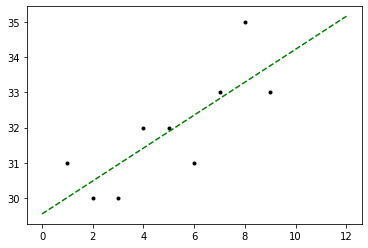

In [17]:

plt.plot(xTrain, yTrain, 'k.')
plt.plot(xNew, yNew, 'g--')

In [18]:

xTrain = np.array([1,2,3,4,5,6,7,8,9])[:, np.newaxis]  
yTrain = np.array([31,30,30,32,32,31,33,35,33])        
xTest = np.array([3,6,9,10,11])[:,np.newaxis]        
yTest = np.array([32,33,30,27,28])                   

In [19]:

model = LinearRegression()
hypothesis = model.fit(xTrain, yTrain)
hpyTrain = model.predict(xTrain)
hpyTest = model.predict(xTest)

In [20]:
ssResTrain = sum((hpyTrain - yTrain) ** 2)
print(ssResTrain)
print(model._residues)

7.822222222222209
7.822222222222221


In [21]:

ssResTest = sum((hpyTest - yTest) ** 2)
ssTotTest = sum((yTest - np.mean(yTest)) ** 2)
Rsquare = 1 - ssResTest / ssTotTest
print(model.score(xTest, yTest))

-3.3273884140550853


In [22]:
print(np.corrcoef(xTrain.T, yTrain.T))  
print(np.corrcoef(xTest.T, yTest.T))    

[[1.         0.79090576]
 [0.79090576 1.        ]]
[[ 1.         -0.83936233]
 [-0.83936233  1.        ]]


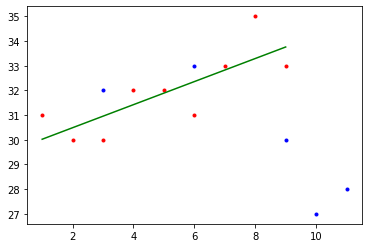

In [23]:

plt.plot(xTrain, yTrain, 'r.')          # 训练点数据(红色)
plt.plot(xTest, yTest, 'b.')            # 测试点数据(蓝色)
plt.plot(xTrain, hpyTrain, 'g-') 